**Preprocessing Dataset**

In [4]:
import pandas as pd
import numpy as np

file_path = '/content/myexcel - myexcel.csv'
dataset = pd.read_csv(file_path)

# Replace Height column values with random numbers between 150 and 180
np.random.seed(42)
dataset['Height'] = np.random.randint(150, 181, size=dataset.shape[0])

# Save the preprocessed dataset
dataset.to_csv('preprocessed_dataset.csv', index=False)


**1.Distribution of employees across teams:**

In [5]:
team_distribution = dataset['Team'].value_counts()
team_percentage = (team_distribution / len(dataset)) * 100

print(team_distribution)
print(team_percentage)


Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz               

**2. Segregate employees by positions:**

In [6]:
position_distribution = dataset['Position'].value_counts()
print(position_distribution)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


**3. Predominant age group:**

In [7]:
age_groups = pd.cut(dataset['Age'], bins=[0, 25, 30, 35, 40, 50], labels=['<25', '25-30', '30-35', '35-40', '40+'])
age_group_distribution = age_groups.value_counts()
print(age_group_distribution)


Age
<25      200
25-30    167
30-35     68
35-40     23
40+        0
Name: count, dtype: int64


**4. Team and position with the highest salary expenditure:**

In [8]:
team_salary = dataset.groupby('Team')['Salary'].sum().idxmax()
position_salary = dataset.groupby('Position')['Salary'].sum().idxmax()

print("Team with highest salary expenditure:", team_salary)
print("Position with highest salary expenditure:", position_salary)


Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


**5. Correlation between age and salary:**

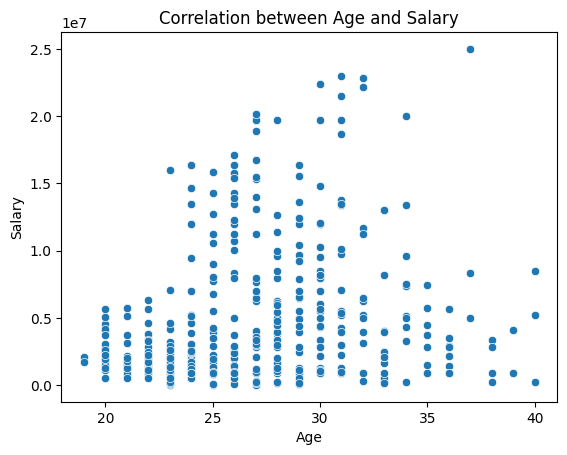

Correlation Matrix:
             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = dataset[['Age', 'Salary']].corr()
sns.scatterplot(x='Age', y='Salary', data=dataset)
plt.title('Correlation between Age and Salary')
plt.show()

print("Correlation Matrix:")
print(correlation)


# **Visualizations**

**1. Distribution of Employees Across Teams**

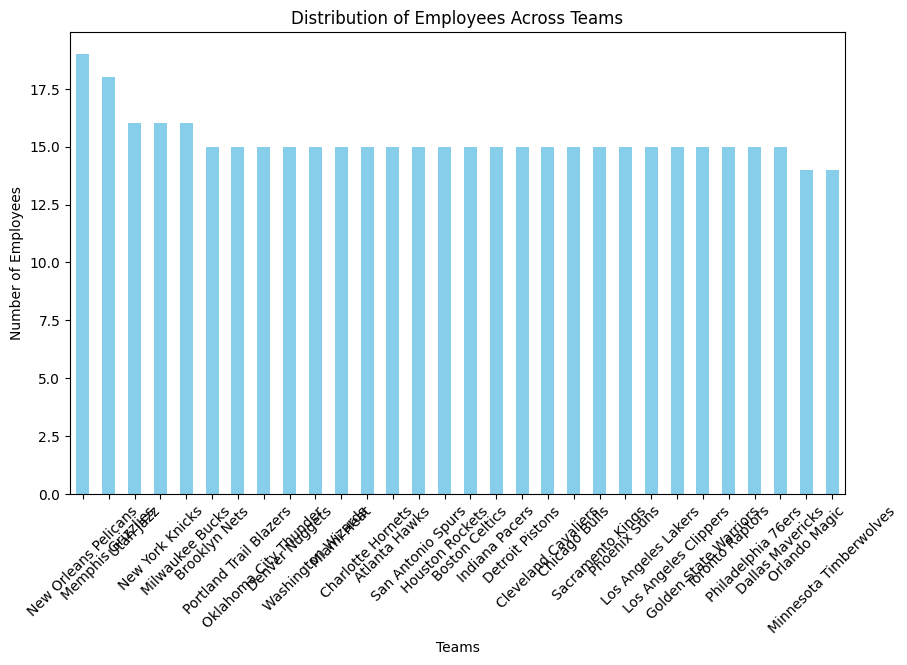

In [18]:
team_distribution = dataset['Team'].value_counts()
team_percentage = (team_distribution / len(dataset)) * 100

plt.figure(figsize=(10, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

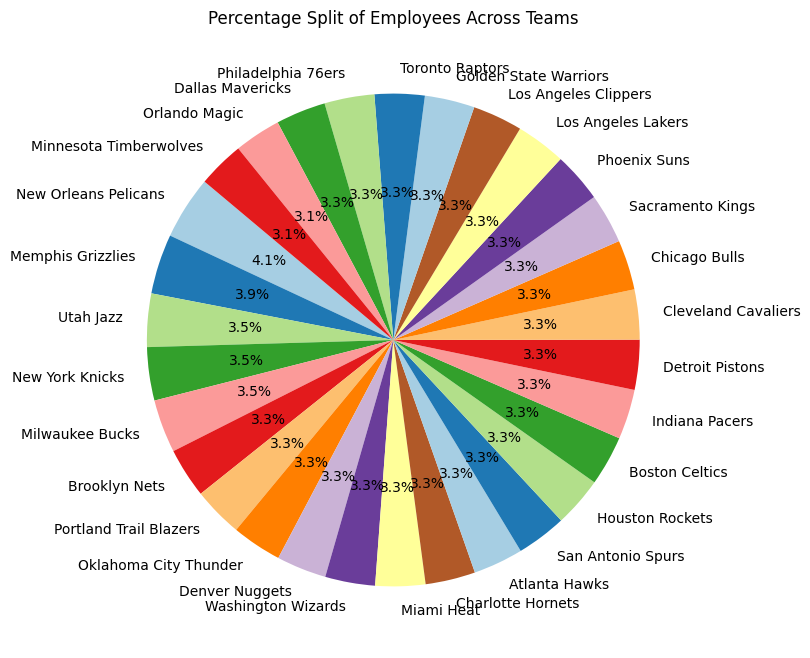

In [17]:
plt.figure(figsize=(8, 8))
team_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Split of Employees Across Teams')
plt.ylabel('')
plt.show()

**2. Employees by Positions**

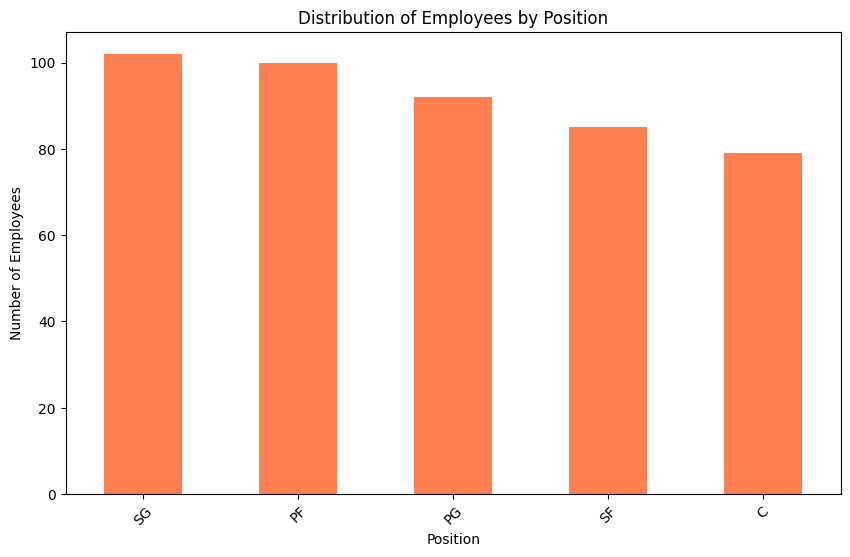

In [13]:
position_distribution = dataset['Position'].value_counts()

plt.figure(figsize=(10, 6))
position_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


**3. Predominant Age Group**

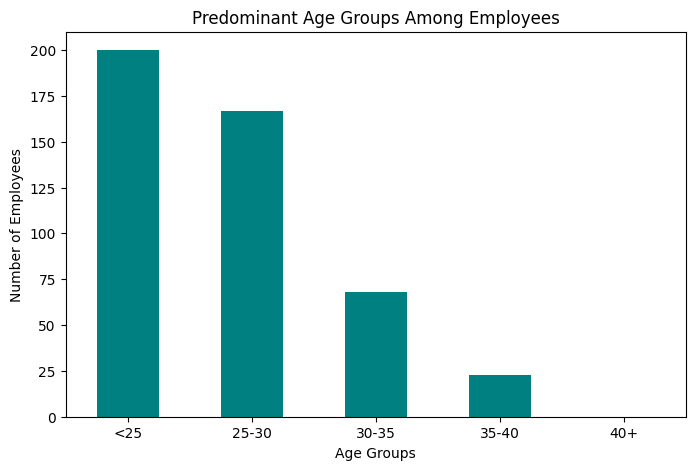

In [14]:
age_groups = pd.cut(dataset['Age'], bins=[0, 25, 30, 35, 40, 50], labels=['<25', '25-30', '30-35', '35-40', '40+'])
age_group_distribution = age_groups.value_counts()

plt.figure(figsize=(8, 5))
age_group_distribution.sort_index().plot(kind='bar', color='teal')
plt.title('Predominant Age Groups Among Employees')
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()


**4. Team and Position with Highest Salary Expenditure**

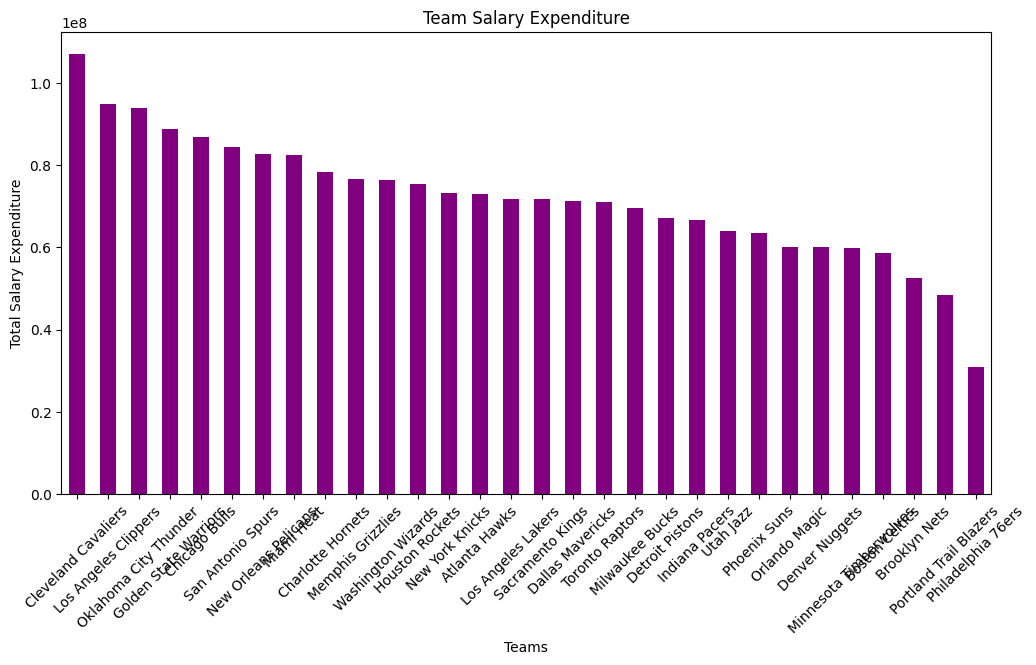

In [15]:
team_salary_exp = dataset.groupby('Team')['Salary'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
team_salary_exp.plot(kind='bar', color='purple')
plt.title('Team Salary Expenditure')
plt.xlabel('Teams')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

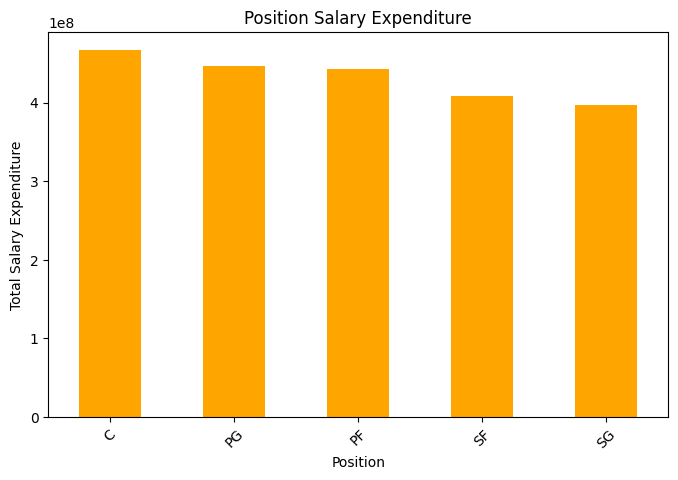

In [16]:
position_salary_exp = dataset.groupby('Position')['Salary'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
position_salary_exp.plot(kind='bar', color='orange')
plt.title('Position Salary Expenditure')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45)
plt.show()

**5. Correlation Between Age and Salary**

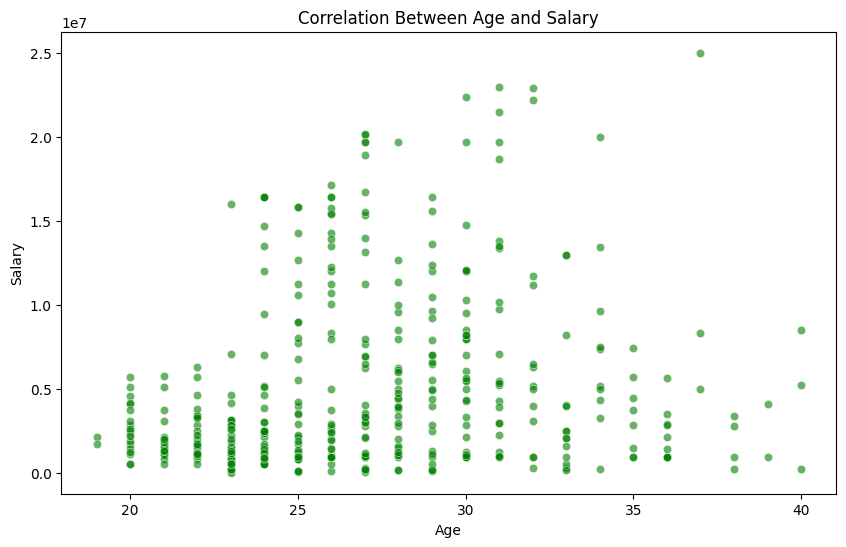

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=dataset, color='green', alpha=0.6)
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

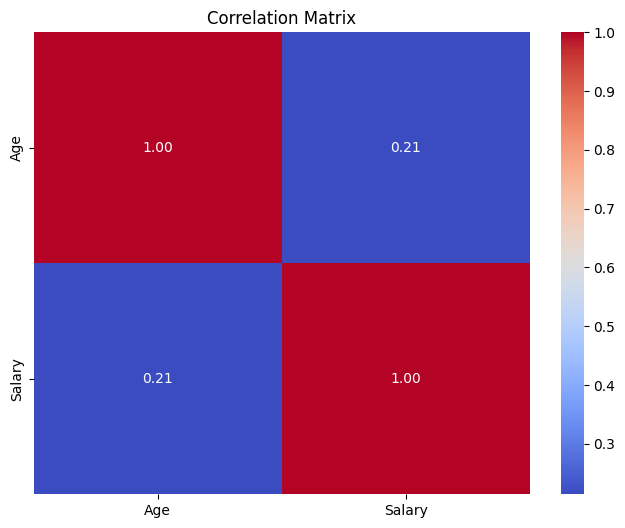

In [19]:
correlation_matrix = dataset[['Age', 'Salary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()